In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
import base
from src.agents import DeepQAgent
from src.util import JupyterCallback

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [3]:
env = gym.make('Breakout-v0')

In [4]:
env.observation_space

Box(210, 160, 3)

In [5]:
env.action_space

Discrete(4)

# Agent

In [6]:
callback = JupyterCallback()

In [7]:
agent = DeepQAgent(env, learning_rate=0.001, frames_per_action=4)
agent

DeepQAgent(
    env=<TimeLimit<AtariEnv<Breakout-v0>>>,
    learning_rate=0.001,
    discount_factor=0.99,
    exploration_rate=1.0,
    exploration_decay=0.9998,
    exploration_min=0.1,
    image_size=(84, 84),
    frames_per_action=4,
    replay_size=20000
)

In [ ]:
agent.run()

100%|██████████| 30/30 [00:16<00:00,  1.77game/s]


array([2., 1., 1., 1., 1., 2., 5., 0., 2., 0., 0., 1., 0., 0., 3., 2., 2.,
       0., 0., 1., 2., 2., 2., 2., 6., 4., 2., 4., 2., 1.])

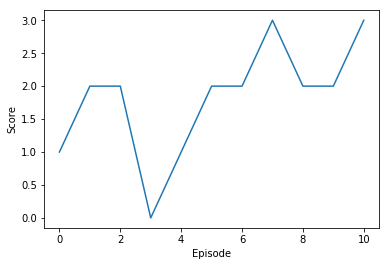

  0%|          | 11/10000 [01:05<16:25:49,  5.92s/episode]

In [ ]:
agent.train(episodes=10000, callback=JupyterCallback())

In [ ]:
agent.run()